## BetaBinomial Model

Кусочек блокнота с фитом BB модели и встречными проблемами

In [5]:
import pymc as pm
import numpy as np
import arviz as az
from scipy.stats import beta as sp_beta
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# сэмлирование

a, b = 1, 8

n = 1
num_days = 1000

p_return = sp_beta.rvs(a, b)
visits = binom.rvs(n, p_return, size=num_days)
cum_visits = np.cumsum(visits)

# фит

model = pm.Model()
with model:
    alpha = pm.HalfNormal("alpha", sigma=10)
    beta = pm.HalfNormal("beta", sigma=10)

    p = pm.Beta("p", alpha=a, beta=b)

    obs = pm.BetaBinomial("obs", n=1, alpha=a, beta=b, observed=visits)

    trace = pm.sample(2000, tune=2000, target_accept=0.95)


Output()

In [3]:
az.summary(trace, var_names=["alpha", "beta"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,7.872,5.952,0.003,18.607,0.140,0.091,1196.0,939.0,1.0
beta,7.774,5.981,0.017,18.839,0.125,0.092,1340.0,958.0,1.0


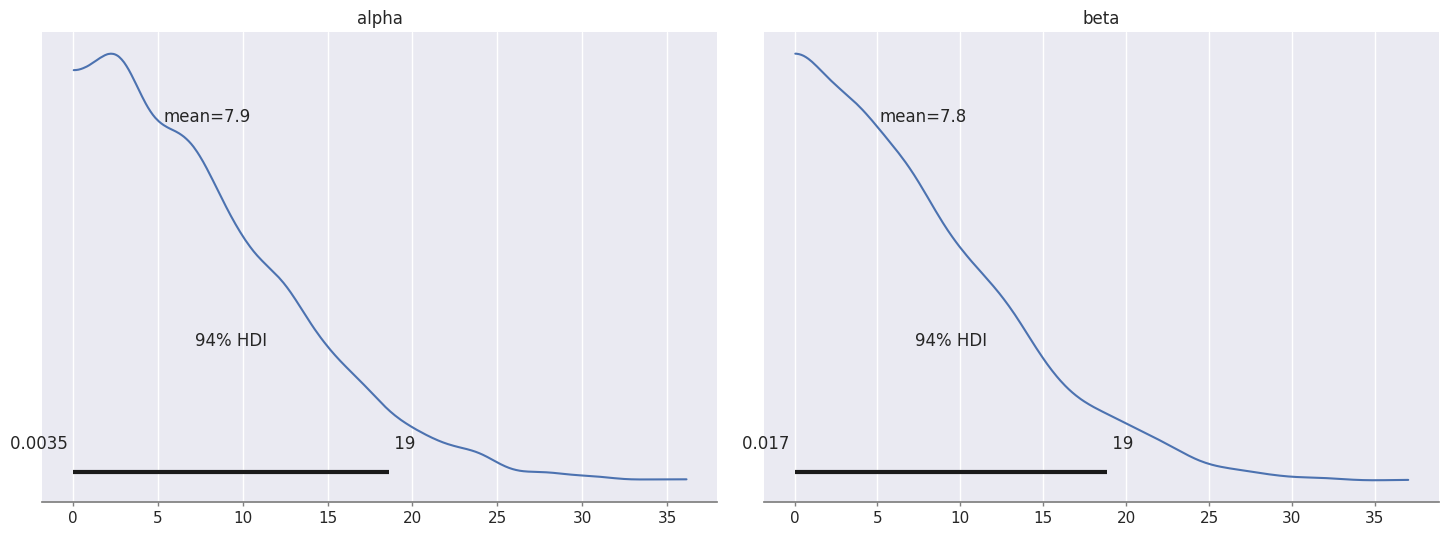

In [6]:
az.plot_posterior(trace, var_names=["alpha", "beta"])
plt.tight_layout()
plt.show()

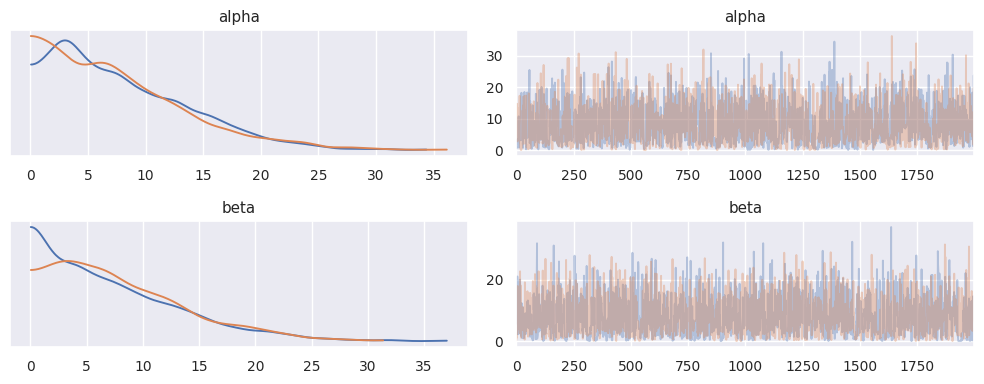

In [7]:
az.plot_trace(trace, var_names=['alpha', 'beta'], figsize = (10, 4), compact=False)
plt.tight_layout() # это чтобы графики не слипались
plt.show()

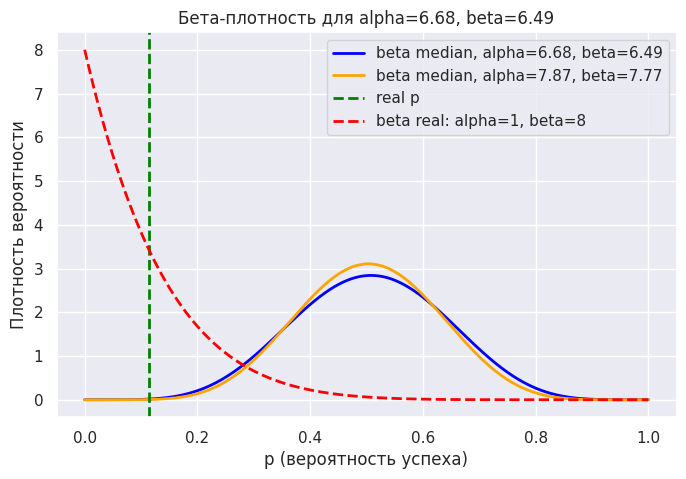

In [14]:
alpha_samples = trace.posterior["alpha"].values.flatten()
beta_samples = trace.posterior["beta"].values.flatten()

alpha_median = np.median(alpha_samples)
beta_median = np.median(beta_samples)

alpha_mean = np.mean(alpha_samples)
beta_mean = np.mean(beta_samples)

p = np.linspace(0, 1, 500)

# плотность бета-распределения
pdf_median = sp_beta.pdf(p, a=alpha_median, b=beta_median)
pdf_mean = sp_beta.pdf(p, a=alpha_mean, b=beta_mean)
pdf_true = sp_beta.pdf(p, a=a, b=b)

# рисуем
plt.figure(figsize=(8,5))
plt.plot(p, pdf_median, color='blue', lw=2, label=f"beta median, alpha={alpha_median:.2f}, beta={beta_median:.2f}")
plt.plot(p, pdf_mean, color='orange', lw=2, label=f"beta median, alpha={alpha_mean:.2f}, beta={beta_mean:.2f}")
plt.title(f"Бета-плотность для alpha={alpha_median:.2f}, beta={beta_median:.2f}")
plt.axvline(p_return, color='green', linestyle='--', linewidth=2, label="real p")
plt.plot(p, pdf_true, label=f"beta real: alpha={a}, beta={b}", color='red', lw=2, linestyle='--')
plt.xlabel("p (вероятность успеха)")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.grid(True)
plt.show()